139.53480277434278 182.97580458385204 0.5480526231293213 151.39662557851565


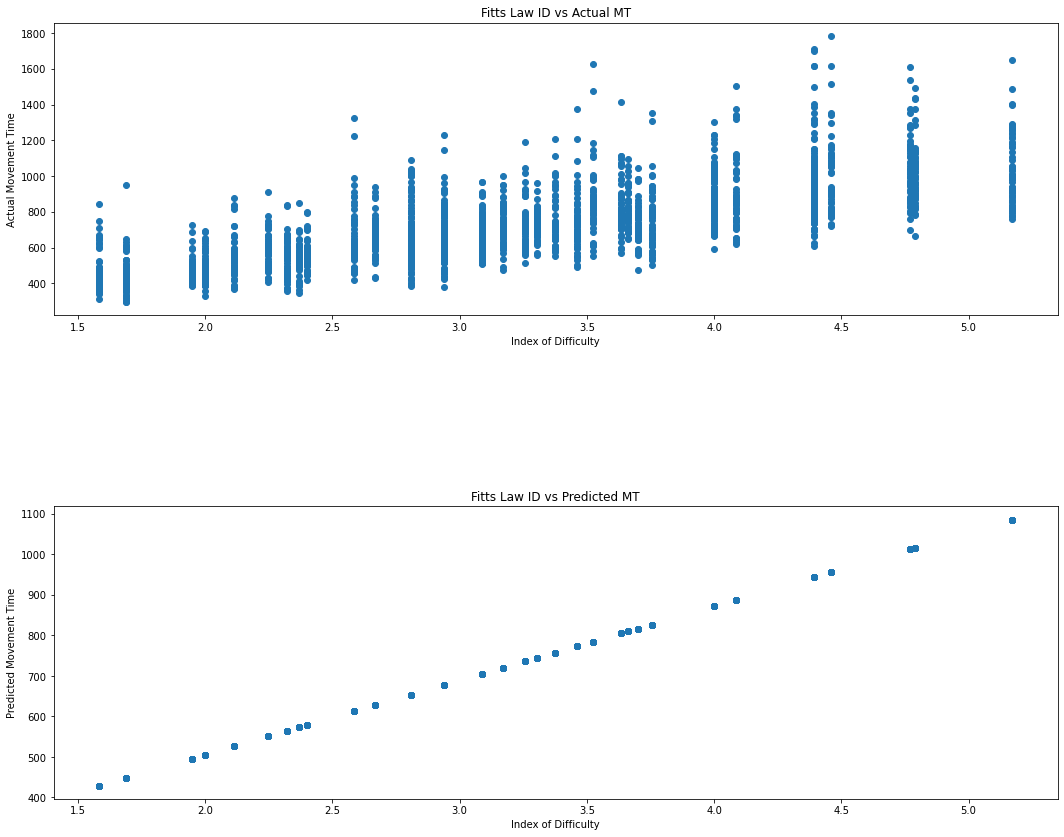

In [32]:
#Section 1: Fitts' Law
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error

#Reading csv file and storing into variable df
df = pd.read_csv("GROUP3_FL.csv")

#Method to find Index of Difficulty for each row of dataset(ID= log2((d/w)+1))
def indexDiff(row):
    return (math.log((float(row['distance'])/float(row['width'])) +1,2))

#Applying the index of difficulty method and creating a new attribute called indexDiff
df['indexDiff'] = df.apply(indexDiff, axis=1)

#Linear Regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df['indexDiff'], df['movement_time'])
a = intercept
b = slope

#Predicted mean MT (MT = a + b * ID)
def predict(row):
    return intercept + slope * float(row['indexDiff'])
df['predictMT'] = df.apply(predict, axis=1)

#Graph of ID vs actual MT and ID vs predicted MT
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout(pad=3.0)
fig.set_size_inches(18, 15)
ax1.set_title('Fitts Law ID vs Actual MT')
ax1.set_xlabel('Index of Difficulty')
ax1.set_ylabel('Actual Movement Time')
ax1.plot(df['indexDiff'], df['movement_time'], 'o')
ax2.set_title('Fitts Law ID vs Predicted MT')
ax2.set_xlabel('Index of Difficulty')
ax2.set_ylabel('Predicted Movement Time')
ax2.plot(df['indexDiff'], df['predictMT'], 'o')

#R**2 and RMSE Values
r2 = r_value**2
RMSE = mean_squared_error(df['movement_time'], df['predictMT'], squared = False)

print(a, b, r2, RMSE)

#Observations 
#The ID vs predicted MT has a positive linear relationship and in the ID vs actual MT graph, the actual MT data has a large standard deviation.
#Since there is a large standard deviation, I also observed how this correlates to why the r_squared value is low and why the RMSE value is so high.

#Final Conclusion 
#Fitts' Law's collected data has a large standard deviation because the formula does not have any limitations in the area it is testing.

66.69812636034226 35.17081030119157 0.8812168259925274 102.9240836068688


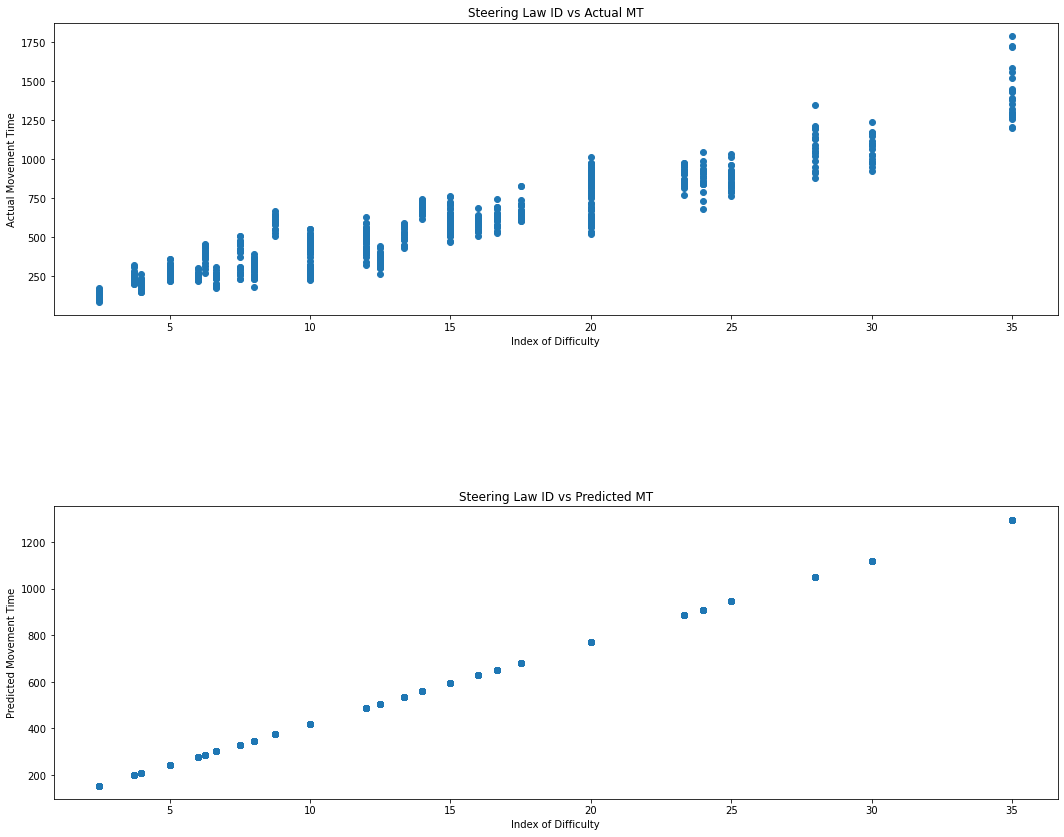

In [33]:
#Section 2: Steering Law
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt

#Reading csv file and storing into variable df
df = pd.read_csv("GROUP3_SL.csv")

#Method to find Index of Difficulty for each row of dataset(ID = A/W)
def indexDiff(row):
    return (float(row['amplitude'])/float(row['width']))

#Applying the index of difficulty method and creating a new attribute called indexDiff
df['indexDiff'] = df.apply(indexDiff, axis=1)

#Linear Regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df['indexDiff'], df['movetime'])
a = intercept
b = slope

#Predicted mean MT (MT = a + b * ID)
def predict(row):
    return intercept + slope * float(row['indexDiff'])
df['predictMT'] = df.apply(predict, axis=1)

#Graph of ID vs actual MT and ID vs predicted MT
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout(pad=3.0)
fig.set_size_inches(18, 15)
ax1.set_title('Steering Law ID vs Actual MT')
ax1.set_xlabel('Index of Difficulty')
ax1.set_ylabel('Actual Movement Time')
ax1.plot(df['indexDiff'], df['movetime'], 'o')
ax2.set_title('Steering Law ID vs Predicted MT')
ax2.set_xlabel('Index of Difficulty')
ax2.set_ylabel('Predicted Movement Time')
ax2.plot(df['indexDiff'], df['predictMT'], 'o')

#R**2 and RMSE Values
r2 = r_value**2
RMSE = mean_squared_error(df['movetime'], df['predictMT'], squared = False)

print(a, b, r2, RMSE)

#Observations
#The ID vs predicted MT graph has a very distinct positive linear relationship.
#The ID vs actual MT graph's data points are very compact compared to Fitts Law data points.
#The r_squared value for Steering Law is high and the RMSE value is lower than Fitts Law's RMSE.

#Final Conclusion 
#Steering Law's collected data is much more compact and has a lower standard deviation compared to Fitts' Law because the formula restricts the calculations to be within a specific area.